<a href="https://colab.research.google.com/github/DevSharma2025/ML/blob/main/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
cost after  401522 is : 1.86936360379852e-20
cost after  401523 is : 1.869096413454478e-20
cost after  401524 is : 1.8688914418953172e-20
cost after  401525 is : 1.8687387446773572e-20
cost after  401526 is : 1.8685221550272198e-20
cost after  401527 is : 1.8682512220746082e-20
cost after  401528 is : 1.868098551109939e-20
cost after  401529 is : 1.867923792544795e-20
cost after  401530 is : 1.8676227475723622e-20
cost after  401531 is : 1.8674584686141364e-20
cost after  401532 is : 1.867283739331509e-20
cost after  401533 is : 1.86707886672706e-20
cost after  401534 is : 1.8668640779517058e-20
cost after  401535 is : 1.8666069936100575e-20
cost after  401536 is : 1.8664543892883577e-20
cost after  401537 is : 1.8662457629681774e-20
cost after  401538 is : 1.8660089401086717e-20
cost after  401539 is : 1.8658409306587794e-20
cost after  401540 is : 1.8656361368142035e-20
cost after  401541 is : 1.8653390747689266e-20
cost after  40154

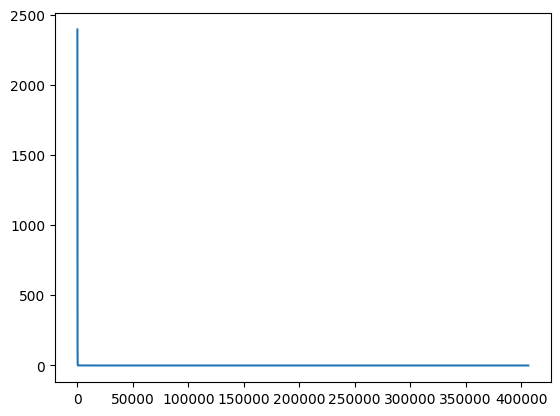

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def cost(x,y,w,b):
    cost = 0
    m= x.shape[0]
    for i in range (m):
        f_wb= np.dot(x[i],w) + b
        cost += (f_wb - y[i]) ** 2
    cost /=(2 * m)

    return cost

def gradiant(x,y,w,b):
    m,n= x.shape
    dj_dwj=np.zeros((n,))
    dj_db=0
    for i in range(m):
        error= np.dot(x[i],w) + b - y[i]
        for j in range(n):

            dj_dwj[j] += (error) * x[i][j]
        dj_db += error

    dj_dwj /= m
    dj_db /= m

    return dj_dwj,dj_db


#gradient descent

def gradiant_descent(x,y,w,b,alpha,iteration=100000):
    m,n=x.shape
    j=np.array([])

    for i in range (iteration):
        dj_dwj,dj_db=gradiant(x,y,w,b)
        for k in range (n):
            w[k]= w[k] - (alpha * dj_dwj[k])
        b -= alpha * dj_db
        k = cost(x,y,w,b)
        j = np.append(j,k)

        if i>1:
            if j[i] == j[i-1]:
                break
        print("cost after ",i+1,"is :",k )


    return w,b,j


def z_scaling(x):
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    x_scaled = ( x - x_mean) / x_std

    return x_scaled, x_mean, x_std

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x = np.array([
    [800, 2, 10],
    [1000, 2, 8],
    [1200, 3, 6],
    [1500, 3, 4],
    [1800, 4, 2]
])

y = np.array([40, 50, 65, 80, 100])



w = np.array([1. ,1. ,1.])
b = 0

X,mean,std=z_scaling(x)

W,B,J = gradiant_descent(X,y,w,b,0.01,10000000)

plt.plot(J,label = "Cost after Iterations")


x_new = np.array([800, 2, 10])

x_new_scaled = (x_new - mean) / std

pred = np.dot(W,x_new_scaled) + B

print(f'Prediction = {pred}')
plt.show()